In [13]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch


filename = 'model_181115_inc_csv_pre_validation_after_epoch_17.dat'

In [14]:
saved = torch.load(filename)

train_loss = saved['train_loss']
train_accuracy = saved['train_accuracy']
test_loss = saved['test_loss']
test_accuracy = saved['test_accuracy']
test_confusion = saved['test_confusion']
classes = saved['classes']


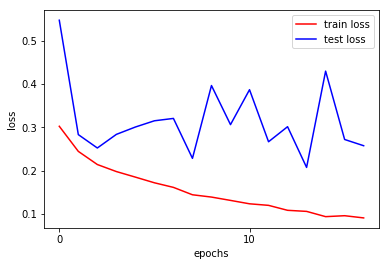

In [15]:
plt.plot(train_loss.numpy(), 'r', label='train loss')
plt.plot(test_loss.numpy(), 'b', label='test loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.xticks(np.arange(0,train_loss.size(0), 10))
plt.show()
#plt.savefig('loss.png')

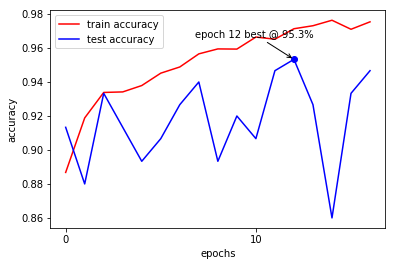

In [16]:
best_epoch = int(np.argmax(test_accuracy.numpy()))
max_accuracy = np.max(test_accuracy.numpy())

plt.plot(train_accuracy.numpy(), 'r', label='train accuracy')
plt.plot(test_accuracy.numpy(), 'b', label='test accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.xticks(np.arange(0,train_accuracy.size(0), 10))
plt.plot(best_epoch, max_accuracy, 'bo')
plt.annotate(
        'epoch {} best @ {:.1f}%'.format(best_epoch, max_accuracy*100),
        xy=(best_epoch, max_accuracy), xytext=(20, 20),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()
#plt.savefig('accuracy.png')

In [17]:
#ax = plt.subplots(1, min(5,test_confusion.size(0)), True, True)
#ax[1][0].set_ylabel('predicted label')
#ax[1][0].set_yticklabels(classes.keys())
#for ii in range(min(5,test_confusion.size(0))):
#    ax[1][ii].imshow(test_confusion[-1-ii,:,:].numpy()[::-1,:], origin='lower')
#    ax[1][ii].set_xlabel('true label')
#    ax[1][ii].set_xticks(np.arange(test_confusion.size(2)))
#    ax[1][ii].set_xticklabels(reversed(sorted(classes.keys())), rotation=90)
#    ax[1][ii].set_yticks(np.arange(test_confusion.size(2)))
#plt.show()
#ax[0].savefig('confusion.png')
print(classes)
print('Best accuracy after epoch {} @ {:.1f}%'.format(best_epoch, max_accuracy*100))
print(test_confusion[best_epoch,:,:])

print('in percent:\n', test_confusion[best_epoch,:,:].numpy()/test_confusion.numpy()[0,:,0].sum()*100)


{0: 'no DMR', 1: 'mild NPDR', 2: 'mod NPDR', 3: 'severe NPDR', 4: 'PDR', 5: 'mod or higher', 6: 'severe or higher'}
Best accuracy after epoch 12 @ 95.3%
tensor([[59.,  6.],
        [ 1., 84.]])
in percent:
 [[ 98.333336   10.       ]
 [  1.6666667 140.       ]]


In [18]:
print('Reduction to 2-class problem:')
if test_confusion.shape[1] == 2:
    confusion_2class = test_confusion[best_epoch,:,:]
else:
    confusion_2class = 'get function here'
                            
print('Accuracy: {:.1f}%'.format(np.diag(confusion_2class).sum()/confusion_2class.sum()*100))
print('Column 1: noDMR + mild NPDR\nColumn 2: moderate + severe NPDR, PDR')
print(confusion_2class)
print('Sensitivity: {:.1f}%'.format(confusion_2class[1,1]/confusion_2class[:,1].sum()*100))
print('Specificity: {:.1f}%'.format(confusion_2class[0,0]/confusion_2class[:,0].sum()*100))

Reduction to 2-class problem:
Accuracy: 95.3%
Column 1: noDMR + mild NPDR
Column 2: moderate + severe NPDR, PDR
tensor([[59.,  6.],
        [ 1., 84.]])
Sensitivity: 93.3%
Specificity: 98.3%


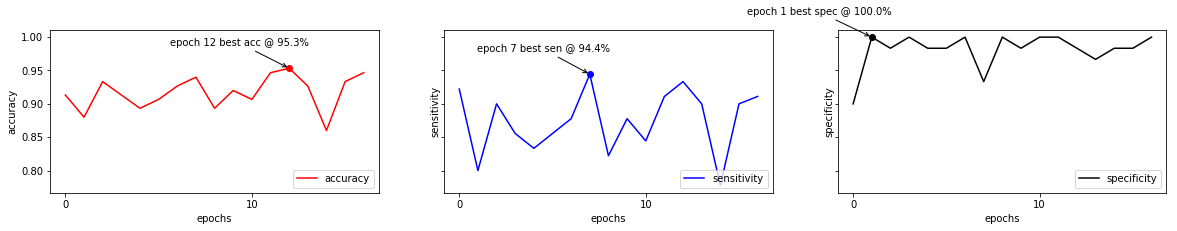

Best accuracy in epoch 12 with accuracy 95.3%, sensitivity 93.3%, specificity 98.3%
Best sensitivity in epoch 7 with accuracy 94.0%, sensitivity 94.4%, specificity 93.3%
Best specificity in epoch 1 with accuracy 88.0%, sensitivity 80.0%, specificity 100.0%


In [21]:
specificity = np.zeros_like(test_accuracy)
sensitivity = np.zeros_like(test_accuracy)
accuracy = np.zeros_like(test_accuracy)
for ii in range(specificity.size):
    confusion_2class = test_confusion[ii,:,:]
    accuracy[ii] = np.diag(confusion_2class).sum()/confusion_2class.sum()
    sensitivity[ii] = confusion_2class[1,1]/confusion_2class[:,1].sum()
    specificity[ii] = confusion_2class[0,0]/confusion_2class[:,0].sum()

max_acc = np.max(accuracy)
best_acc = np.argmax(accuracy)
max_sen = np.max(sensitivity)
best_sen = np.argmax(sensitivity)
max_spe = np.max(specificity)
best_spe = np.argmax(specificity)


ax = plt.subplots(1, 3, True, True, figsize=(20,3))

ax[1][0].plot(accuracy, 'r', label='accuracy')
ax[1][0].plot(best_acc, max_acc, 'ro')
ax[1][0].annotate(
        'epoch {} best acc @ {:.1f}%'.format(best_acc, max_acc*100),
        xy=(best_acc, max_acc), xytext=(20, 20),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[1][0].legend(loc='lower right')
ax[1][0].set_ylabel('accuracy')
ax[1][0].set_xlabel('epochs')
ax[1][0].set_xticks(np.arange(0,accuracy.size+1, 10))

ax[1][1].plot(sensitivity, 'b', label='sensitivity')
ax[1][1].plot(best_sen, max_sen, 'bo')
ax[1][1].annotate(
        'epoch {} best sen @ {:.1f}%'.format(best_sen, max_sen*100),
        xy=(best_sen, max_sen), xytext=(20, 20),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[1][1].legend(loc='lower right')
ax[1][1].set_xlabel('epochs')
ax[1][1].set_ylabel('sensitivity')
ax[1][1].set_xticks(np.arange(0,accuracy.size+1, 10))

ax[1][2].plot(specificity, 'k', label='specificity')
ax[1][2].plot(best_spe, max_spe, 'ko')
ax[1][2].annotate(
        'epoch {} best spec @ {:.1f}%'.format(best_spe, max_spe*100),
        xy=(best_spe, max_spe), xytext=(20, 20),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[1][2].legend(loc='lower right')
ax[1][2].set_xticks(np.arange(0,accuracy.size+1, 10))
ax[1][2].set_ylabel('specificity')
ax[1][2].set_xlabel('epochs')
plt.show()

print('Best accuracy in epoch {} with accuracy {:.1f}%, sensitivity {:.1f}%, specificity {:.1f}%'.format(
       best_acc, accuracy[best_acc]*100, sensitivity[best_acc]*100, specificity[best_acc]*100))
print('Best sensitivity in epoch {} with accuracy {:.1f}%, sensitivity {:.1f}%, specificity {:.1f}%'.format(
       best_sen, accuracy[best_sen]*100, sensitivity[best_sen]*100, specificity[best_sen]*100))
print('Best specificity in epoch {} with accuracy {:.1f}%, sensitivity {:.1f}%, specificity {:.1f}%'.format(
       best_spe, accuracy[best_spe]*100, sensitivity[best_spe]*100, specificity[best_spe]*100))
